In [9]:
import nbimporter
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from Funciones import CV

from sklearn.datasets import load_boston
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [10]:
lin_reg = LinearRegression()

In [11]:
df = pd.read_csv("datos_limpios_full")
df = df.drop(['Unnamed: 0'], axis = 1)

In [12]:
df.head()

,90s,SCA,SCA90,PassLive,PassDead,Sh,Fld,Def,GCA,GCA90,...,Sh/90,SoT/90,FK,PK,PKatt,xG,npxG,G-xG,np:G-xG,VAL
0,0.732813,0.309419,-0.165855,-0.015902,-0.409064,2.623403,2.100294,0.415269,-0.283919,-0.298934,...,0.837151,0.883946,-0.330482,3.465004,5.074111,3.369886,2.544491,-1.760491,-1.366460,83
1,-1.245045,-0.912122,-0.578240,-1.000430,-0.409064,-0.137608,-0.272519,-0.600919,-0.283919,1.470006,...,0.830112,0.611156,-0.330482,-0.236273,-0.253577,-0.229974,-0.192367,-1.008033,-1.024160,73
2,-1.421473,-0.986155,-1.051269,-1.000430,-0.409064,-0.689810,-0.667987,-0.600919,-0.803086,-0.501098,...,-0.810032,-0.570937,-0.330482,-0.236273,-0.253577,-0.666320,-0.705528,-0.004756,0.002743,63
3,1.345670,1.382895,0.222272,2.160422,-0.219494,-0.137608,-0.667987,-0.600919,2.052330,0.408642,...,-0.465109,-0.328456,-0.330482,-0.236273,-0.253577,0.097286,0.192504,-0.088363,-0.082832,87
4,0.621384,-0.319860,-0.572175,-0.171354,-0.409064,-0.689810,-0.667987,-0.600919,-0.543502,-0.400016,...,-0.591815,-0.510316,-0.330482,-0.236273,-0.253577,-0.520871,-0.534474,-0.339182,-0.339558,76


In [13]:
#REGRESION LINEAL
lin_reg = LinearRegression()
CV(df,10)
df = df.drop(['is_train'], axis = 1)

In [14]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=0)

Y_train = X_train['VAL']
Y_test = X_test['VAL']
X_train = X_train.drop(['VAL'],axis = 1)
X_test = X_test.drop(['VAL'],axis = 1)
Y_train_1 = Y_train.values
Y_test_1 = Y_test.values
X_train_1 = X_train.values
X_test_1 = X_test.values
lin_reg.fit(X_train_1,Y_train_1) #hago la regresion
Y_prediction = lin_reg.predict(X_test_1)#predigo

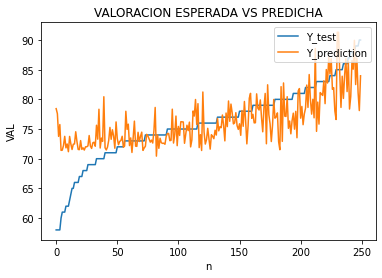

In [15]:
l = []
l1 =list(Y_test)
l2 = list(Y_prediction)
l1new = []
l2new = []
for i in range(len(Y_test)):
    l.append([l1[i],l2[i]])
while len(l) != 0:
    c = 0
    min = l[0][0]
    for i in range(len(l)):
        if l[i][0] < min:
            min = l[i][0]
            c = i
    l1new.append(l[c][0])
    l2new.append(l[c][1])
    l.pop(c)
n = list(range(len(Y_test)))
fig, ax = plt.subplots()

ax.plot(n, l1new, label = "Y_test")
#ax.plot(n, n1, label = "n^2 - 1")
ax.plot(n, l2new, label = "Y_prediction")
#ax.plot(n, n2, label = "3^(n^2)")
ax.legend(loc = 'upper right')
ax.set_xlabel("n")
ax.set_ylabel("VAL")
ax.set_title("VALORACION ESPERADA VS PREDICHA")
plt.savefig('VALORACION ESPERADA VS PREDICHA.png')

<AxesSubplot:xlabel='VAL', ylabel='error'>

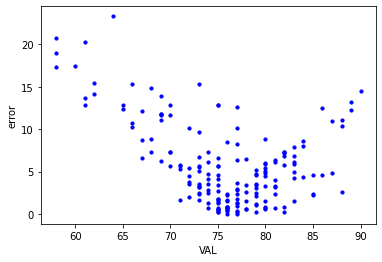

In [38]:
#error según la valoracion
df_er = pd.DataFrame([Y_test_1, Y_prediction], index = ['VAL','Error'])
df_er.index = ['Y_test', 'Y_prediction']
df_er = df_er.transpose()
df_er['error'] = abs(df_er['Y_test'] - df_er['Y_prediction'])
df_er.plot.scatter(x = 'Y_test', y = 'error', s = 10, c = 'blue' )

In [17]:
df_er['error'].mean()

3.3647627356783425

In [18]:
##########################################################################
######## REGRESION LINEAL CON VAL > 70 ##########
###########################################################################

In [19]:
#Veamos si quedandonos con datos por encima de 70 se arregla la cosa
df1 = df[df['VAL']> 69]

In [20]:
#Quitamos jugadores con datos NaN
df1 = df1.dropna()

X_train, X_test = train_test_split(df1, test_size=0.2, random_state=0)

Y_train = X_train['VAL']
Y_test = X_test['VAL']
X_train = X_train.drop(['VAL'],axis = 1)
X_test = X_test.drop(['VAL'],axis = 1)
Y_train = Y_train.values
Y_test = Y_test.values
X_train = X_train.values
X_test = X_test.values
lin_reg.fit(X_train,Y_train) #hago la regresion
Y_prediction = lin_reg.predict(X_test)#predigo

<AxesSubplot:xlabel='Y_test', ylabel='error'>

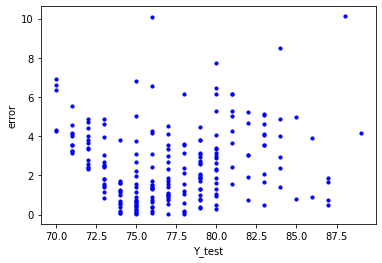

In [21]:
#error según la valoracion
df_er = pd.DataFrame([Y_test, lin_reg.predict(X_test)], index = None)
df_er.index = ['Y_test', 'yhat_test']
df_er = df_er.transpose()
df_er['error'] = abs(df_er['Y_test'] - df_er['yhat_test'])
df_er.plot.scatter(x = 'Y_test', y = 'error', s = 10, c = 'blue' )

In [22]:
df_er['error'].mean()

2.5666247414578702

In [23]:
##########################################################################
######## REGRESION LINEAL CON JUGADORES QUE JUEGAN MINUTOS ##########
###########################################################################

In [24]:
df['90s'].quantile([0.25,0.5,0.75])
df2 = df[df['90s']> -0.921579] #-0.921579 es el primer cuantil

In [25]:
#Quitamos jugadores con datos NaN
df2 = df2.dropna()

X_train, X_test = train_test_split(df2, test_size=0.2, random_state=0)

Y_train = X_train['VAL']
Y_test = X_test['VAL']
X_train = X_train.drop(['VAL'],axis = 1)
X_test = X_test.drop(['VAL'],axis = 1)
Y_train = Y_train.values
Y_test = Y_test.values
X_train = X_train.values
X_test = X_test.values
lin_reg.fit(X_train,Y_train) #hago la regresion
Y_prediction = lin_reg.predict(X_test)#predigo

<AxesSubplot:xlabel='Y_test', ylabel='error'>

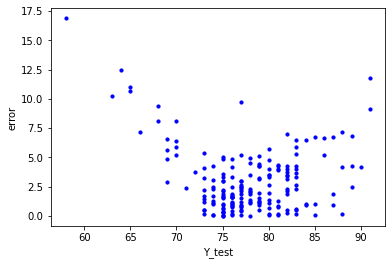

In [26]:
#error según la valoracion
df_er = pd.DataFrame([Y_test, lin_reg.predict(X_test)], index = None)
df_er.index = ['Y_test', 'yhat_test']
df_er = df_er.transpose()
df_er['error'] = abs(df_er['Y_test'] - df_er['yhat_test'])
df_er.plot.scatter(x = 'Y_test', y = 'error', s = 10, c = 'blue' )

In [27]:
df_er['error'].mean()

2.998623288402665

In [28]:
##########################################################################
######## REGRESION LINEAL CON VAL > 69 Y 90S > 6 #########################
##########################################################################

In [29]:
#Combinacion de las anteriores
df3 = df[df['90s']> -0.921579] #-0.921579 es el primer cuantil
df3 = df3[df3['VAL']>69]

In [30]:
#Quitamos jugadores con datos NaN
df3 = df3.dropna()

X_train, X_test = train_test_split(df3, test_size=0.2, random_state=0)

Y_train = X_train['VAL']
Y_test = X_test['VAL']
X_train = X_train.drop(['VAL'],axis = 1)
X_test = X_test.drop(['VAL'],axis = 1)
Y_train = Y_train.values
Y_test = Y_test.values
X_train = X_train.values
X_test = X_test.values
lin_reg.fit(X_train,Y_train) #hago la regresion
Y_prediction = lin_reg.predict(X_test)#predigo

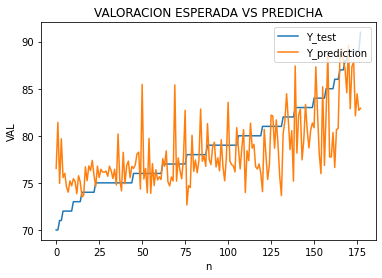

In [31]:
l = []
l1 =list(Y_test)
l2 = list(Y_prediction)
l1new = []
l2new = []
for i in range(len(Y_test)):
    l.append([l1[i],l2[i]])
while len(l) != 0:
    c = 0
    min = l[0][0]
    for i in range(len(l)):
        if l[i][0] < min:
            min = l[i][0]
            c = i
    l1new.append(l[c][0])
    l2new.append(l[c][1])
    l.pop(c)
n = list(range(len(Y_test)))
fig, ax = plt.subplots()

ax.plot(n, l1new, label = "Y_test")
#ax.plot(n, n1, label = "n^2 - 1")
ax.plot(n, l2new, label = "Y_prediction")
#ax.plot(n, n2, label = "3^(n^2)")
ax.legend(loc = 'upper right')
ax.set_xlabel("n")
ax.set_ylabel("VAL")
ax.set_title("VALORACION ESPERADA VS PREDICHA")
plt.savefig('VALORACION ESPERADA VS PREDICHA.png')

<AxesSubplot:xlabel='Y_test', ylabel='error'>

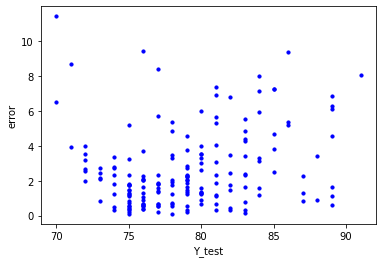

In [32]:
#error según la valoracion
df_er = pd.DataFrame([Y_test, lin_reg.predict(X_test)], index = None)
df_er.index = ['Y_test', 'yhat_test']
df_er = df_er.transpose()
df_er['error'] = abs(df_er['Y_test'] - df_er['yhat_test'])
df_er.plot.scatter(x = 'Y_test', y = 'error', s = 10, c = 'blue' )

In [33]:
df_er['error'].mean()

2.6171475618199675

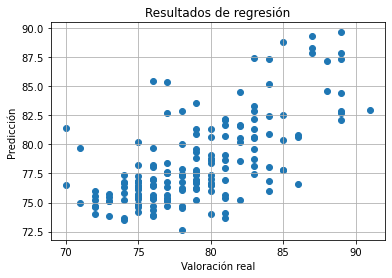

In [34]:
import matplotlib.pyplot as plt
t = np.arange(-10.0, 10.0, 0.05)
fig, ax = plt.subplots()
ax.scatter(Y_test, Y_prediction)


ax.set(xlabel='Valoración real', ylabel='Predicción',
       title='Resultados de regresión')
ax.grid()

fig.savefig("test.png")
plt.show()